# Import Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder   

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Import data set

In [2]:
df = pd.read_csv("/home/yulius/Education_data/Loan-Prediction-Dataset/train.csv",index_col='Loan_ID')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df_test = pd.read_csv("/home/yulius/Education_data/Loan-Prediction-Dataset/test_lAUu6dG.csv",index_col='Loan_ID')
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


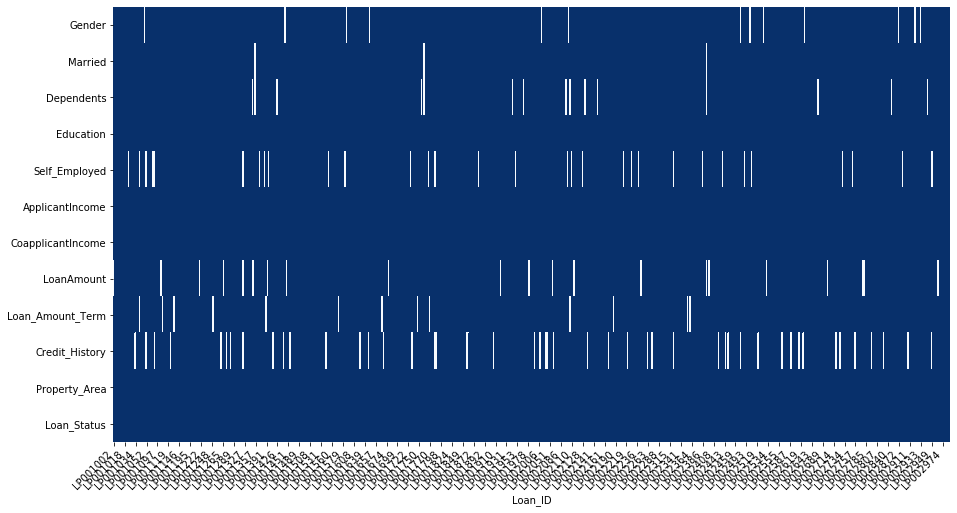

In [3]:
plot_missing_value(df)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
num_col =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
categori = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area','Credit_History']

In [58]:
for col_name in list(['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area','Credit_History','Loan_Status']):
    print('\nUnique Values Count ' + 'Variable =>',col_name)
    print(df[col_name].value_counts())


Unique Values Count Variable => Gender
Male      489
Female    112
Name: Gender, dtype: int64

Unique Values Count Variable => Married
Yes    398
No     213
Name: Married, dtype: int64

Unique Values Count Variable => Dependents
Small     345
Medium    203
High       51
Name: Dependents, dtype: int64

Unique Values Count Variable => Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Unique Values Count Variable => Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Unique Values Count Variable => Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Unique Values Count Variable => Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Unique Values Count Variable => Loan_Status
1    422
0    192
Name: Loan_Status, dtype: int64


In [39]:
df['Dependents'].replace('3+',3,inplace=True)

In [43]:
df['Dependents'].dropna(inplace=True)

In [57]:
df['Dependents'].replace(['0','1','2',3], ["Small","Medium","Medium","High"],inplace=True)

# Label encoder

In [8]:
Le = LabelEncoder()
df.Loan_Status = Le.fit_transform(df.Loan_Status)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Dataset Splitting

In [10]:
X = df.drop(columns="Loan_Status")
y = df.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

# Training Model

# 1. Simple model

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [12]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), num_col),
    ('categoric', cat_pipe(encoder='onehot'), categori),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.2650640588680905, 'algo__gamma': 10, 'algo__learning_rate': 0.11207606211860571, 'algo__max_depth': 9, 'algo__n_estimators': 148, 'algo__reg_alpha': 0.12563152773938674, 'algo__reg_lambda': 0.03975977214318099, 'algo__subsample': 0.3233328316068077}
0.7983706720977597 0.7983315876103547 0.8536585365853658


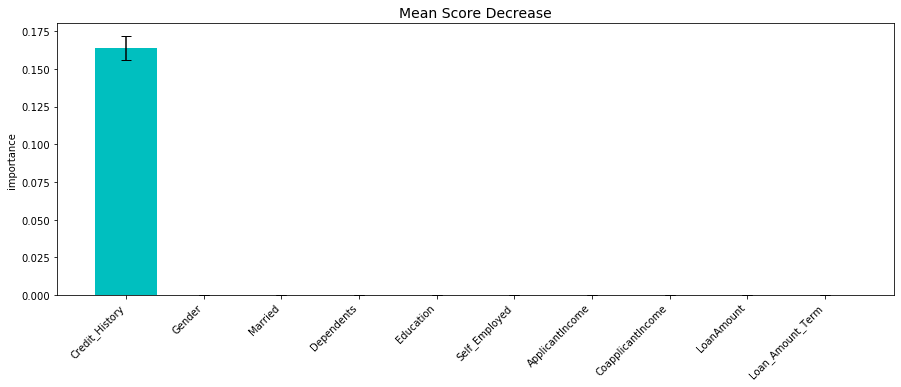

In [14]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

## smiple ver 2

In [71]:
# Note: You could not use gsp, rsp, and bsp recommendation in advance mode
# You should specify your own parameter grid / interval when tuning
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='standard', transform='yeo-johnson'), ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']),
    ('categoric1', cat_pipe(encoder='ordinal'), ['Dependents','Education','Property_Area']),
    ('categoric2', cat_pipe(encoder='onehot'), ['Gender', 'Married',
       'Self_Employed'])    
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/jcopml/pipeline/_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6179267600882911, 'algo__gamma': 2, 'algo__learning_rate': 0.14019550306309433, 'algo__max_depth': 1, 'algo__n_estimators': 132, 'algo__reg_alpha': 1.7571818426047676, 'algo__reg_lambda': 1.9167165948710119, 'algo__subsample': 0.6129698350507864, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.6924643584521385 0.6884009177515088 0.6829268292682927


/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


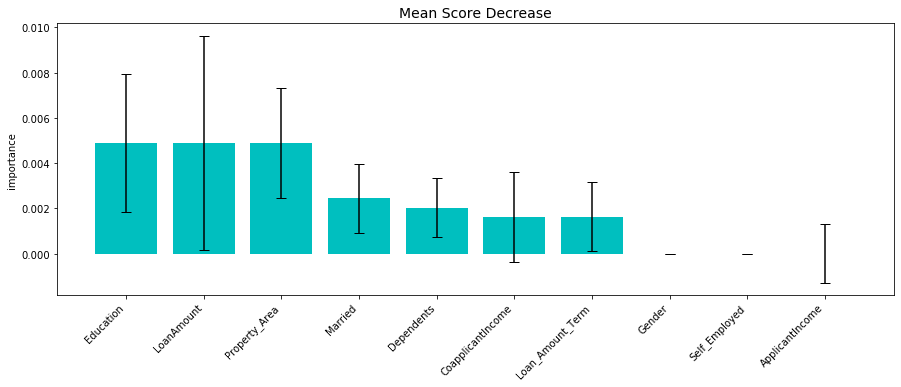

In [72]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# 2. Poly

In [62]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2,transform='yeo-johnson', scaling='minmax'), ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']),
    ('categoric', cat_pipe(encoder='onehot'), ['Gender', 'Married', 'Education',
       'Self_Employed','Property_Area','Credit_History']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/jcopml/pipeline/_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6069593960609854, 'algo__gamma': 10, 'algo__learning_rate': 0.040665633135147955, 'algo__max_depth': 5, 'algo__n_estimators': 101, 'algo__reg_alpha': 0.5456725485601479, 'algo__reg_lambda': 0.05762487216478603, 'algo__subsample': 0.3610191174223894, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': False}
0.7983706720977597 0.7983315876103547 0.8536585365853658


/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


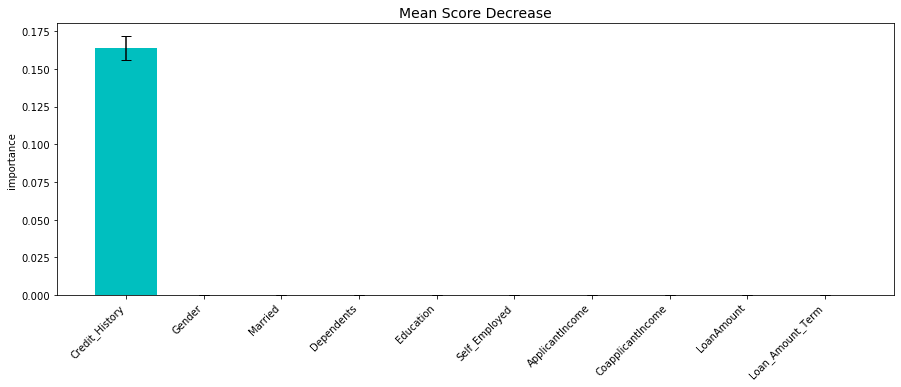

In [63]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# 3. Feature selection

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 82.4+ KB


In [19]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=3,transform='yeo-johnson', scaling='robust'), ['Credit_History','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/jcopml/pipeline/_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.48875051677790426, 'algo__gamma': 1, 'algo__learning_rate': 0.11208547084229371, 'algo__max_depth': 10, 'algo__n_estimators': 191, 'algo__reg_alpha': 7.852755494724264, 'algo__reg_lambda': 0.008532678095658717, 'algo__subsample': 0.3453032172664104, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.7983706720977597 0.7983315876103547 0.8536585365853658


/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Save data

In [20]:
# df_test['Loan_Status']=model.predict(df_test)
# df_test['Loan_Status'].replace([0,1], ['N','Y'], inplace=True)
# df_test['Loan_Status'].value_counts()

df_test['Loan_Status'].to_csv('sub1.csv', index=True)

# Handling imbalance dataset

In [97]:
X_train_=preprocessor.fit_transform(X)
X_test_=preprocessor.fit_transform(X_train)

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [98]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_train_res,y_train_res=smk.fit_resample(X_train_,y.ravel())
X_train_res.shape,y_train_res.shape

((786, 24), (786,))

In [99]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 393, 0: 393})


In [100]:

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])


model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train_res, y_train_res)

print(model.best_params_)
print(model.score(X_train_res, y_train_res), model.best_score_, model.score(X_train_res, y_train_res))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


ValueError: Specifying the columns using strings is only supported for pandas DataFrames